In [1]:
# Initial imports
import pandas as pd
from path import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Load data/Read in CSV file.
df = pd.read_csv("AA_Airline_Delay_Cause.csv")
# df = pd.read_csv("All_Airline_Delay_Cause_2022.csv")
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,10,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",12404.0,2132.0,605.34,107.00,...,10.19,864.08,152.0,63.0,204255.0,73289.0,9817.0,31024.0,852.0,89273.0
1,2022,9,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",12108.0,2107.0,660.63,124.59,...,5.28,893.56,175.0,45.0,200822.0,79696.0,10567.0,20617.0,370.0,89572.0
2,2022,8,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",13051.0,2938.0,829.64,217.15,...,12.60,1199.03,726.0,153.0,259731.0,101046.0,21063.0,33145.0,636.0,103841.0
3,2022,7,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",12680.0,2875.0,862.42,141.91,...,9.15,1394.26,298.0,30.0,259180.0,97890.0,12647.0,20655.0,393.0,127595.0
4,2022,6,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",12411.0,3137.0,994.64,159.30,...,6.97,1416.80,601.0,65.0,273956.0,109056.0,17343.0,26831.0,246.0,120480.0


### This is analysis of all AA airline delays for the first 10 months of 2022.  The plots of the five delay types versus single delay type to identify distrubutions among the type of delay.

In [3]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [4]:
# Isolate the five delay type columns
df2 = df[['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].copy()
df2 = df2.dropna()
df2.head()

,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,204255.0,73289.0,9817.0,31024.0,852.0,89273.0
1,200822.0,79696.0,10567.0,20617.0,370.0,89572.0
2,259731.0,101046.0,21063.0,33145.0,636.0,103841.0
3,259180.0,97890.0,12647.0,20655.0,393.0,127595.0
4,273956.0,109056.0,17343.0,26831.0,246.0,120480.0


In [5]:
print(df.shape)
# df.describe

(10, 21)


In [6]:
# df2 = df[['arr_flights', 'carrier_delay']].copy()
# df2 = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].copy()
# df2 = df2.dropna()
# df2.head()

In [7]:
# df.describe

In [8]:
data = df

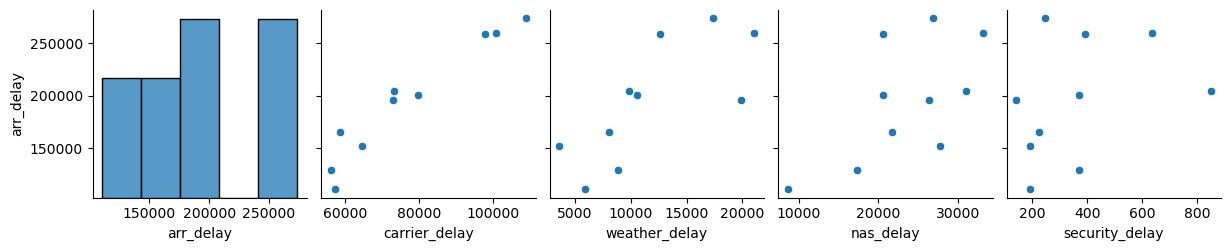

In [9]:
# Use Pairplot to plot the five delay types vs arrival_delays
df = data
sns.pairplot(
    data,
#     x_vars=['weather_delay', 'nas_delay', 'security_delay'],
    x_vars=['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay'],
    y_vars=['arr_delay'],)
# plt.show()

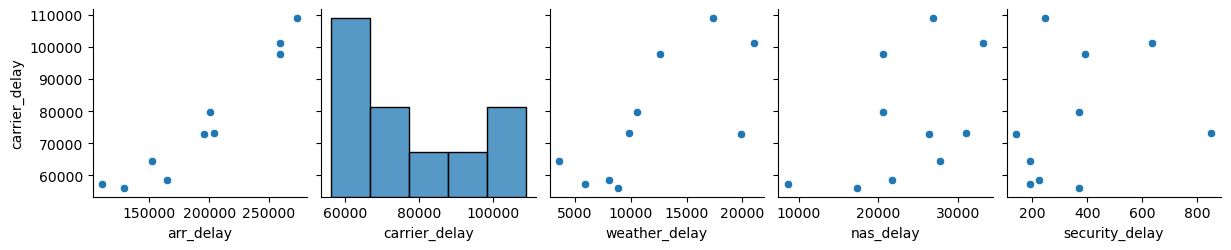

In [10]:
# Plot five delay types vs carrier delay
df = data
sns.pairplot(
    data,
#     x_vars=['weather_delay', 'nas_delay', 'security_delay'],
    x_vars=['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay'],
    y_vars=['carrier_delay'],)
# plt.show()

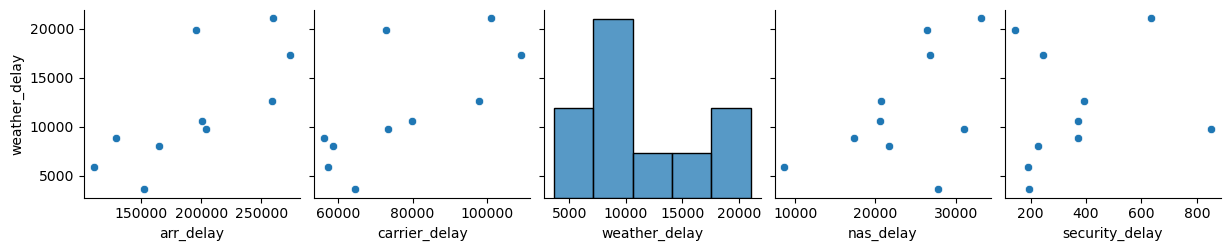

In [11]:
# Plot five delay types vs weather delays
df = data
sns.pairplot(
    data,
#     x_vars=['weather_delay', 'nas_delay', 'security_delay'],
    x_vars=['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay'],
    y_vars=['weather_delay'],)
# plt.show()

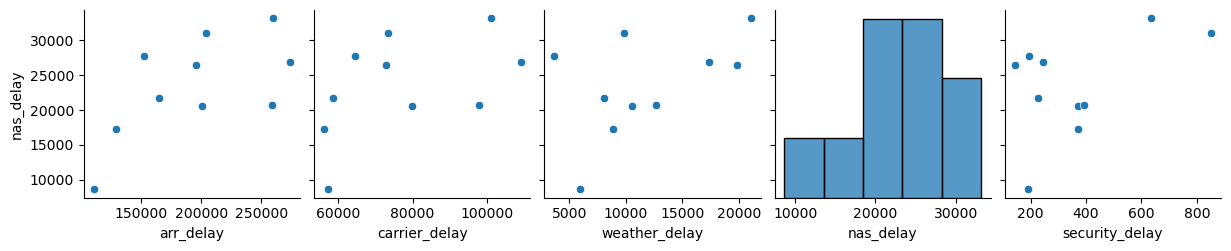

In [12]:
# Plot five delay types vs National Air Service System delay
df = data
sns.pairplot(
    data,
#     x_vars=['weather_delay', 'nas_delay', 'security_delay'],
    x_vars=['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay'],
    y_vars=['nas_delay'],)
# plt.show()

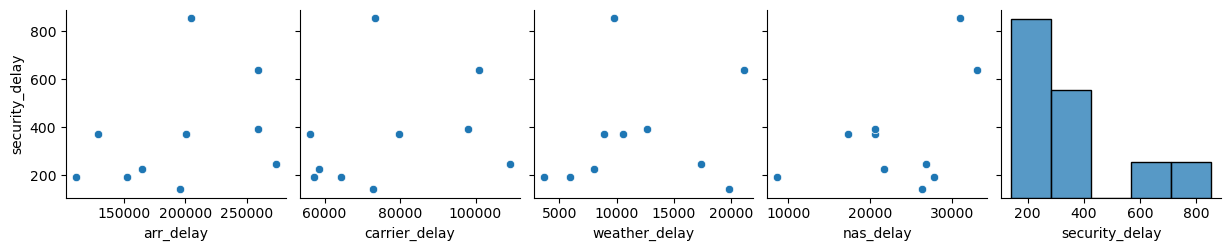

In [13]:
# Plot five delay types vs security delay
df = data
sns.pairplot(
    data,
#     x_vars=['weather_delay', 'nas_delay', 'security_delay'],
    x_vars=['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay'],
    y_vars=['security_delay'],)
# plt.show()

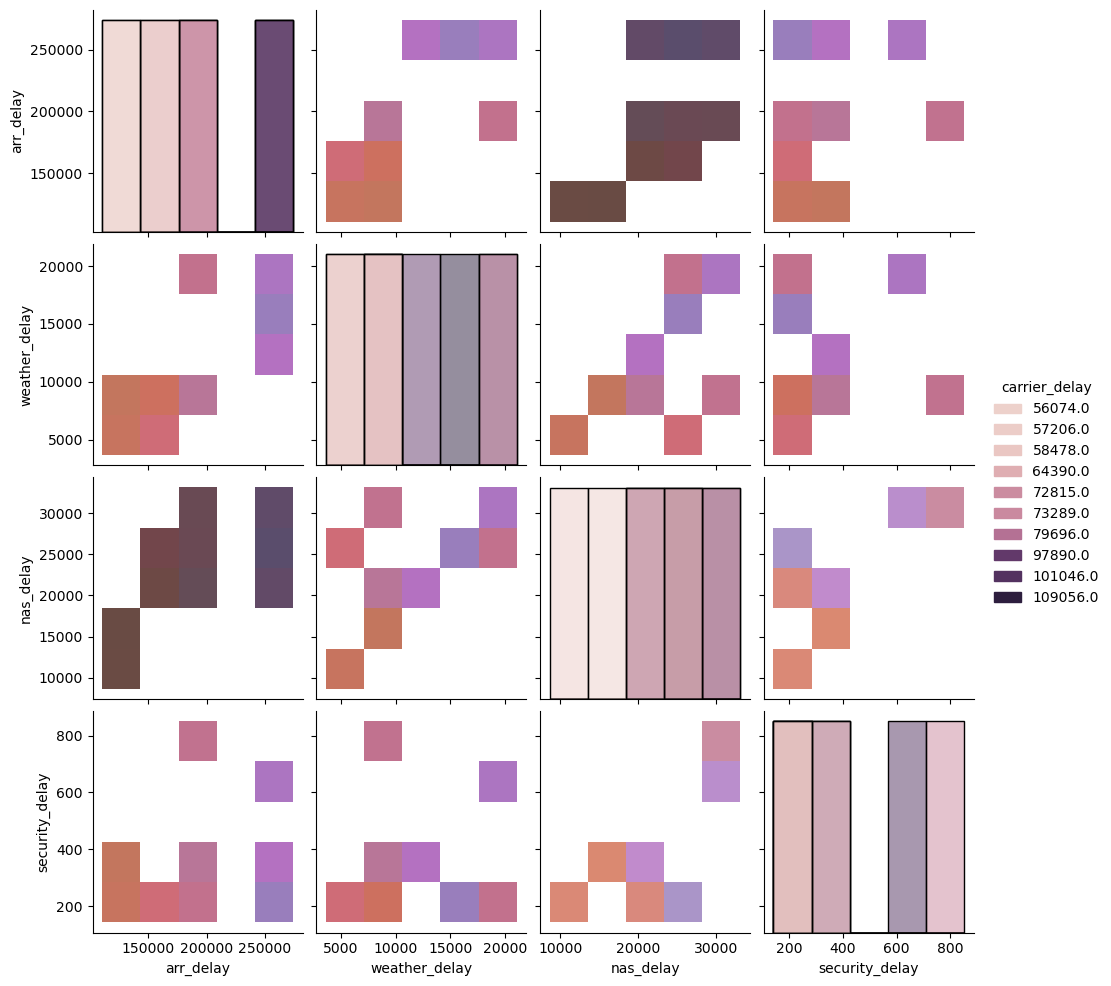

In [14]:
# Plot delay causes type values vs carrier_delays
data = pd.read_csv("AA_Airline_Delay_Cause.csv", 
        usecols=['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay'])

sns.pairplot(data=data, hue='carrier_delay', kind='hist')


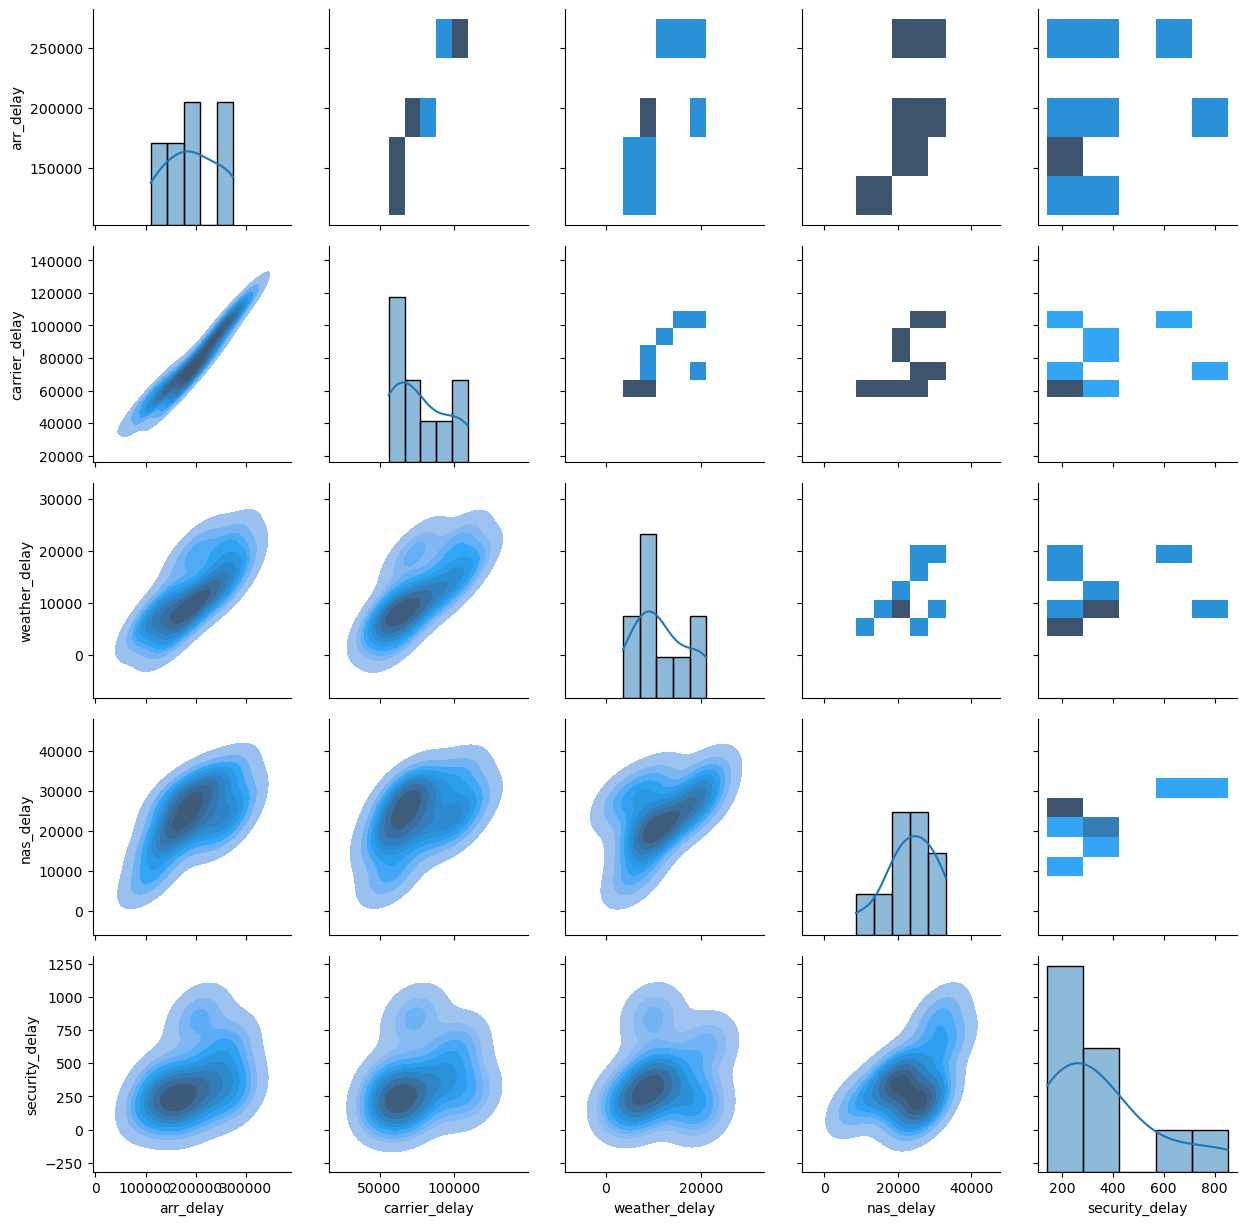

In [15]:
# Use PairGrid on dataset for relationships 
g = sns.PairGrid(data)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)